In [ ]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 163 kB 19.5 MB/s 
  Created wheel for openai: filename=openai-0.20.0-py3-none-any.whl size=54118 sha256=be65ebd0cb19534b54cc2ebbf52368f9353acf61a1ab661e30c236f6ab90c6e6
  Stored in directory: /root/.cache/pip/wheels/71/8d/9b/e28529ec53123e0279208f99148d4661232120d78cb866839b
Successfully built openai


In [ ]:
import os
# import openai
import pandas as pd
import time

In [ ]:
openai.api_key = ""

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving overruling.csv to overruling.csv


In [ ]:
df1 = pd.DataFrame(columns = ['Sentence', 'Label'])
for i in range(len(df)):
  example = df['sentence1'][i]
  response = openai.Completion.create(
      model="text-davinci-002",
      prompt="generate 10 legally overruled sentence.\nexample : "+example+"\n",
      temperature=0.45,
      max_tokens=256,
      top_p=1,
      frequency_penalty=0,
      presence_penalty=0
  )
  list_sen = response['choices'][0]['text'].split("\n")
  list_sen = list_sen[1:]
  for items in list_sen:
    df1 = df1.append({'Sentence' : items[3:], 'Label' : df['label'][i]},
                ignore_index = True)
  print(i)
  time.sleep(4)

In [ ]:
df1.to_csv("Synthetic data.csv")

In [ ]:
print(example)

thus, we hold that henceforth prohibition may not be employed to raise the defense of workers' compensation immunity.


In [ ]:
openai.api_key = ""

In [ ]:
df2 = pd.DataFrame(columns = ['Sentence', 'Label'])
for i in range(len(new_df)):
  example = new_df['sentence1'][i]
  response = openai.Completion.create(
      model="text-davinci-002",
      prompt="generate 10 legally overruled sentence.\nexample : "+example+"\n",
      temperature=0.45,
      max_tokens=256,
      top_p=1,
      frequency_penalty=0,
      presence_penalty=0
  )
  list_sen = response['choices'][0]['text'].split("\n")
  list_sen = list_sen[1:]
  for items in list_sen:
    df2 = df2.append({'Sentence' : items[3:], 'Label' : new_df['label'][i]},
                ignore_index = True)
  print(i)
  time.sleep(4)

In [ ]:
df2.to_csv('Synthetic data.csv', mode='a', index=False, header=False)

# next

In [ ]:
openai.api_key = ""

In [ ]:
df3 = pd.DataFrame(columns = ['Sentence', 'Label'])
for i in range(len(df)):
  example = new_df_2['text'][i]
  response = openai.Completion.create(
      model="text-davinci-002",
      prompt="generate 10 legally not overruled sentence.\nexample : "+example+"\n",
      temperature=0.45,
      max_tokens=256,
      top_p=1,
      frequency_penalty=0,
      presence_penalty=0
  )
  list_sen = response['choices'][0]['text'].split("\n")
  list_sen = list_sen[1:]
  for items in list_sen:
    df3 = df3.append({'Sentence' : items[3:], 'Label' : new_df_2['label'][i]},
                ignore_index = True)
  print(i)
  time.sleep(4)

In [ ]:
df3.to_csv('Synthetic data (1).csv', mode='a', index=False, header=False)

In [ ]:
syntheticdata_df = pd.read_csv('Synthetic data (2) - Synthetic data (2).csv')
syntheticdata_df

In [ ]:
syntheticdata_df.isnull()

In [ ]:
cleaned_df = syntheticdata_df.dropna()

In [ ]:
cleaned_df

In [ ]:
cleaned_df.to_csv('cleaned synthdata.csv')

#NLPAUG (Synonym aug using word2vec)

In [ ]:
!pip install nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.9 MB/s eta 0:00:00


In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

import nltk
import pandas as pd

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df

,text,label
0,"less than two years ago, this court decided we...",1
1,"according to napa auto parts, the straws drove...",0
2,we therefore overrule mathis to the extent it ...,1
3,because all presumptions are in favor of the c...,0
4,"accordingly, we recede from that portion ofhen...",1
...,...,...
1915,the court relied on 64.875 which provides tha...,0
1916,this notice must be posted in the waiting room...,0
1917,we approve the decisions in woolard and marque...,1
1918,"earls, 2017 ark. 171, at 9, 518 s.w.3d at 87.",0


In [ ]:
word2vec_df = pd.DataFrame(columns = ['text', 'label'])
for i in range(len(df)):
  text = df['text'][i]
  aug = naw.SynonymAug()
  augmented_text = aug.augment(text)
  augmented_text = augmented_text[0]
  if df['label'][i] == 1:
    word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
                ignore_index = True)
  else:
    word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
                ignore_index = True)
  print(augmented_text)

<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-i

less than ii years ago, this court decided webb v. sowell, 387 sec. c. 328, 692 entropy. e. 2d 543 (2010 ), which held that ordering a non - tutelar parent to pay college expenses violates adequate protective cover, so overruling thirty years of precedent flowing from risinger v. risinger.
fit in to napa auto parts, the straws drove the fomite " " for around 6 [] calendar week and [] for between 500 to 600 miles prior to the fortuity with no incidents. " "
we therefore overrule mathis to the extent it adopted the presumption philosophy.
because all presumptions are in favor of the constitutionality of a legislative act, the loading be on the party claiming that the law of nature exist unconstitutional to testify it.
accordingly, we draw back from that portion ofhenderson which conflicts with our ruling here, affirm washington ' s convictions, and indorse conflict withcrawford.
the legislative story informs our interpretation of 1498.
examine commonwealth 5. sadberry, 44 mass. app. ct. 

<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-in

father contend that there was substantive evidence lay out regarding the party ' incomes that would cause enable the trial court to make a determination regarding child support.
because jones / go cart relates simply to sufficiency of the grounds, we hereby disavow the language holding differently in sandoval.
we invert the duncan case to the extent that they hold that pending motions to suppress dress not become preliminary pleas after prosecution has been instituted.
we therefore invert the order denying the motion to bottle up and recede from any language in moskowitz which could be interpreted contrary to our holding in this vitrine.
we hither merely pull back from prior cases in order to establish a rule which we are win over leave be productive of results more nearly consonant with the demand of justice and the dictates of ethics and ethics.
the intention of the party operating theatre their own beliefs as to what state is the kid ' s abode state are irrelevant.
we therefore over

<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-in

nor execute ms. shahin offer any bureau interpretation rule 59 (e ), or any legal parameter to persuade this margaret court that the gesture for rethink was incorrectly settle.
we therefore overrule tomco and el farra on this full point, and hold that a territorial dominion motor lodge, when presented with a 10 (j) petition, need not determine whether there is reasonable cause to believe that an unfair labor practice take been committed.
because of this, and because the johnson remedy also independently relied on coram nobis principles, we deem it inappropriate to continue to trust on the johnson remedy, and conclude that the restitution of a denied direct appeal through resentencing to establish a new appeal time frame is no longer viable.
we nowadays over - rule barnes, gallic, and tucker to the extent that they infringe with the requisite and provisions of the mississippi river rules of polite function and subsequent decisions of this court.
accordingly, we approve the 3rd territori

<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-i

lack of a sua sponte self - defense lawyers instruction.
nevertheless, for the reasons already stated, appellate court should reckon to the evidence stage at the consolidation or severance hearing, and to the extent that hoyt potty be read to permit appellate review of severance issues base only upon the offenses actually elected at the close of the grounds, it is overruled.
the prosecutor in effect disengage the dubiousness.
we disapprove of those cases in which tourist court of appeals have hold differently.
see id. ; see also meyer v. jones, 696 n. w. second 611, 614 (iowa 2005) (" " when a state action threatens to deprive a somebody of a protected familiarity or property interest, a person is title to procedural due unconscious process. " " ). procedural due outgrowth requires notice and the opportunity for hearing appropriate to the nature of the showcase.
# # note: people v. john davis comprise affirmed non overrule.
to that degree as our guinea pig of james dean v. james dean, 

<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-in

inasmuch as the supreme court of the united states has directly held that a geographical term which was descriptive of the blank space where the article be manufactured was not registrable yet though it had acquired a secondary meaning, we must follow our determination in the overhead door typeface, supra, which comprise in harmony with the views of the supreme court, and in so far as the opinion in the casing of in re plymouth motor corporation, supra, expresses a contrary view, it must be considered as overruled.
edwards v. fireman ' s retirement organisation of st. louis, mo. app. , 410 s. w. 2d 560; mitchell v. city of springfield, mo. app. , 410 due south. w. 2d 585; and heusmann v. priest, mo. app. , 366 s. w. 2d xlii, are disapproved insofar as they hold that in this berth a reviewing court may not press the evidence and cause its ain findings of fact.
affirmed in part and remanded schellhas, judge ramsey county district courtfile no. 62 - cr - 16 - 7992 lori swanson, attorney g

<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-

considering defendant ' s lack of any prior felon record, that he manifestly had never done anything like this before, and other circumstances of this case, we do not conceive defendant make up distinctive of intimate offender who receive the maximum sentence.
accordingly, we are compelled to hold lanthanum. civ. code art. 160 unconstitutional as violative of the equal protection clauses of the state and federal united states constitution and to overturn loyacano cinque. loyacano
it also explicitly precludes review of " " whether the outlander is actually inadmissible or ennoble to any ease from remotion, " " id. 1252 (e) (five ), and of " " any other cause or claim arising from oregon relate to the implementation or operation of " " the removal order, id. 1252 (a) (2) (a) (one ).
163 ill. app. 3 d at 103.
on march xiv, 2018, the district court filed a bill in this court certifying that, in light of the nevada sovereign court ' s recent decision in williams v. state of matter departmen

<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-i

to the extent that it conflicts with this opinion, we reject alexander ranch v. central appraisal dist.
idaho. , advert barnes v
statements such as this did not rape defendants ' twenty percent amendment right.
the case live all decided prior to the suit cited above in the textual matter.
carmen and fugate, to the extent that they contravene with this thought, are reverse.
" " intoxication may be proven by the suspect ' s behaviour let in: loss of counterbalance, slurred speech, lack of trunk coordination, and impairment of motor physiological reaction. " "
to the extent it have any verve left, we take issue with perumal.
however, to the extent that these decisions stand up for such a proposition, we recede and dramatise the subroutine set up forth in formula 9. 140 (b) and section 924. 06 (three ), florida statutes (1995 ).
give domond, it is clear that this dry land is obstinate to current precedent, and cannot stand.
boykin v. george phosphorus. morehead living tr. , no. m2014 - 005

<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-

because the issues in this case are effectual in nature, our review make up for sound error.
we bring home the bacon the following explanations of this building ' s application.
therefore, to the extent mckinney and civella are discrepant with this suggestion, they be overruled.
that voice communication, dissimilar 114, does not define the safe harbor to infringements of union copyright.
in light of the fact that ducote represented a substantial departure from the interpretation of pollution exclusion clause in la, and, to a greater extent importantly, because ducote run counter to the true intent of the riddance, we overrule it at this time.
so, to the extent that sir geoffrey wilkinson holds otherwise, it make up overruled.
the language and complex body part of mt. gas constant. 75 (a) dictate that these character were incorrectly make up one's mind.
sort of, as discussed, the board singly set out wherefore it would be appropriate to bring employee picketing within that frameworkincl

<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-in

therefore, the assertion in these quondam eccentric but reflect the prevailing law at the time, a dominion abrogated by the present translation of section 634
to the extent that the decisions in cosmopolitan motors corp. v. ramsey, allis - chalmers mfg. co. v. coplin, ford motor co. v. lemieux lumber co. , ford motor colorado. v. revert, and pierce v. ford motor centennial state. hold or imply that an automobile franchise is the agent beaver state representative of the manufacturer if the dealership performs warranty or recollection work, they are disapproved.
franks and wingfield, supra, are overruled as far as their repugnance with this nurse.
idaho. at 143 north. 612, watt second. a. 1192.
contrary to the grandmother ' s controversy on appeal, nether the circumstances of this character, there was a book binding and effective waiver by her of the right to counsel (cf. matter of soto v willis, 143 ad3d 728, 729 - 730 ).
to the extent any language in woody herman suggest differently, w

<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-i

but the politics in jones ne'er took a position as to kick wrongdoing review (because the challenge to the piece and toolmark examiner ' south testimony was preserved ).
to the extent that preceptor hill holds that a derivative claimant can perfect a lien without timely supply all of the notices required by section liii. 056 of the texas property code, it is overthrow.
the court of appeals reversed the district court ' s conclusion and remit to the district lawcourt to engage in a quantum meruit analysis by applying a set of factors that it listed in the opinion.
those cases (cavarly and mark clark) and such cases as land of blake, 157 cal. 448 [108 p. 287 ], and landed estate of hamon, 136 cal. app. 517 [29 p. 2nd 326 ], are disapprove insofar as the question herein decided represent concerned.
all former amendments need the court ' s permit beaver state a specification of the parties.
defendant institutionalise four varsity letter to counselling between january 2011 and november 2014

<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-in

2016) (quote minn. sent. guideline 2. d. 1 (supp.
a, c s, aligning itself with east river, expressly rejects pennsylvania glass, which, as we receive stated, provided the base for vaughn ' s terms to the cartesian product itself tort recuperation.
taken in light of the party ' contentious history, the grounds do non so understandably preponderate against the trial court ' s decision as to render information technology erroneous.
so, in the same twelvemonth we settle latimer we overruled a different sentencing case law in multitude v. king (1993) 5 cal. quaternary 59 (king ).
any affirmation to the contrary in johnson v. county of fresno, lxiv cal. app. 2d 576 [149 p. second 38 ]; klimper v. city of glendale, 99 cal. app. 2d 446 [222 p. 2d 49 ]; brown v. sequoia union high school dist. , 89 cal. app. 2d 604 [201 p. 2d 66 ]; and slavin v. city of glendale, 97 cal. app. 2d 407 [217 p. 2d 984 ], are disapproved.
the timeliness of bradshaw ' s attack to obtain a pdr retry determines when hi

<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-i

visitation court ' s finding personify non against manifest weight of evidence.
the courtroom of appeal adopt a somewhat more than restrained construction of the regulation.
any brief that appellant file must abide by with the applicable provisions of the tx dominion of appellate routine, including rule thirty eight. 1, which sets knocked out the prerequisite for an appellant ' s legal brief.
years later on, the suspect perjured himself in front of a grand jury when he cost called to bear witness as portion of a renewed investigation into the alleged counterfeiting.
as an intermediate appellate tribunal, we are required to follow the keeping of the ohio sovereign court, which is the ultimate authority on matters of state of matter jurisprudence.
we are so persuaded that information technology is time, indeed retiring time, to overthrow bumpkin and the cases relying upon it and to recognize iaac claims premised upon appellate counsel ' s alleged failure to levy a particular issue on dir

<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-in

further, we no longer adhere to the panorama of ianniello and it issue that kinship and persistence be necessary characteristics of a rico enterprise.
had juror vitamin c. b complex. divulge her prior experiences and temperament toward those experiences, any competent counselling would suffer struck her from the jury with a peremptory challenge.
2017) (citations, internal quotation marks, and brackets pretermit ), cert. deny, 138 sulfur. cat. 983 (2018 ).
the apa leave that judicial revue be useable for " " terminal agency action [s] for which there be no former adequate remedy in a court. " "
lawyer for appellant rory gallaghermarion county public defenderindianapolis, indiana attorneys for appellee curtis t. hill, jr. attorney general of robert indiana ian mcleandeputy attorney generalindianapolis, indiana appeal from the marion superscript court of law the honorable jacques louis david hooper, magistrate trial court movement no. 49g12 - 1610 - cm - 39839 bailey, judge.
we respectful

<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-in

idaho. at 259 - lx.
nevertheless, we right away take the opportunity to overrule lumpkin and carr and their issue, to the extent that these shell characterize the notice requirements set out in section 11 - 46 - eleven as jurisdictional requirements.
bradford and hollingsworth are reverse to the extent that they hold that 5g1. 2 (d) is discretionary and that remand make up necessary where the apprendi assault can be cure by running sentences consecutively under that section.
in light of the test set up forth in brown, supra, it comprise readily apparent that the spoken communication in branch and draper be no longer valid, therefore we expressly overrule the aforementioned language bear in outgrowth and draper.
the female parent did non react, and the enatic grandma pick up the children and kept them " " all summer. " "
we overrule abril to the extent that it rely on the abrogated common jurisprudence principle of inherent legal power to castigate illegal prison term.
however, in a foo

<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-i

see n. c. gen. stat. 7b - 201 (a) (2017 ); see also n. c. gen. stat. 7b - 1000 (b) (" " in any case where the court finds the juvenile to be. .. dependant, the legal power of the court to modify any order or disposition made in the case shall continue during the minority of the juvenile person, until terminated by order of the court, or until the juvenile is otherwise emancipated. " " ). respondent - father was and is free to lodge a movement in the suit to modify the conditions of his visitation with diana.
so, we approve the decisiveness nether review and disapprove the hold in in re forfeiture of 1978 bmw that an innocent co - possessor ' s interest in belongings be forgo along with the guilty co - owner ' s interestingness.
see gem state. , at 1683 - 1685, and n. 44; bottomley, patent cases in the court of chancery, 1714 - lviii, xxxv j. legal hist. 27, 36 - xxxvii, xli - xliii (2014 ).
two courts of charm have conclude that an appeal should non be countenance in this situation, an

<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython

we square off whether a person receive a legitimate outlook of concealment on a " " instance - by - case basis, considering the facts of each particular situation. " "
courts moldiness construe legal brief " " jolly as yet liberally. " "
id. at seventeen - 18, citing douglas, 135 ohio st. at 647 - 48, 22 newton. e. 2nd 195; stone v. phillips, 9th dist. summit no. 15908, 1993 wl 303281, * troika (august. 11, 1993 ); and de garza v. chetister, 62 oh app. 2d 149, 155, 405 n. e. 2d 331 (6th dist. 1978 ).
catch tr. , vol. 2 at ninety nine.
since the holding in dade union is to the perverse, that decisiveness personify overruled.
we agree with the territory court that the political doubtfulness doctrine block off the servicemembers ' suit. so, we need not reach the ftca preemption payoff.
consequently, failing to perform, or failing to do competently, under a declaration cannot itself give rise to tort financial obligation, but if the like conduct violates an severally subsist duty, the fact

<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-in

to the extent that barnes send away be read to allow a direct appealingness from an adjudicative agency decision reexamine by the superior court within the meaning of 5 - 6 - 35 (a) (1 ), information technology be hereby disapproved.
to the extent that rabbit warren is inconsistent with this popular opinion, information technology is overrule.
insofar as obiter dictum in landau v. fording (1966) 245 cal. app. 2d 820, 824, 830 [54 cal. rptr. 177 ], affd. per curiam (1967) 387 u. sec. 456 [18 l. ed. 2d 1317, lxxxvii entropy. ct. 2109 ], suggests a contrary reading of the california statute, information technology equal hereby disapproved.
we override his assignments of error and avow in state v. beverly, 2016 - ohio river - 8078, 75 nitrogen. east. three d 847 (second dist. ).
we recede from these cases to the extent that they hint that postconviction stand in constitute appropriate where the record coif not demonstrate that an in reality biased juror dish out on the jury.
as this holdin

<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-i

by our holding today, we drop off from this motor lodge ' s previous opinions in robertson, juan ramon jimenez, and walter raleigh, a decision which we do non undertake lightly.
gem state. nor would the transaction undermine the commission ' s ability to work out its " " replete regulative baron " " terminated utilities.
therefore, to the extent that those case comprise in conflict with today ' s holding they live overruled.
but samia dress not bring forth any of those third company as witnesses, and the panel embody not need to course credit samia ' s second - hand and unsubstantiated account.
gonzalez - lopez, 548 u. mho. at one hundred fifty.
we do not understand lang to have override hoben.
this standard of brushup affords considerable deference to the test court provide that the homage playact in accordance with the governing rules of law.
this assignment of error be consequently overruled.
we agree with clements and the motor lodge of limited appeals that cjp 12 - 302 (c) does no

<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-

xx. an ineffective assistance of counsel claim base on the failure to charge a quelling motion is without merit if trial counsel lack a legal operating room actual basis to do so.
casey jones, slip op. at sixteen (adduce stinson v. joined state of matter, 508 u. s. xxxvi, forty five (1993) ).
president johnson testify at trial that the man holding the gas was one of the ii gentleman's gentleman wearing a spicy jumper.
for clearness, we pause to note that by overturning winter storm, we besides abrogate any decision insofar as it has trust on winter storm, specifically, consub delaware llc v. schahin engenharia limitada.
thus, the presence of an equivocalness in a contract does not forever indicate a structural failure; information technology could only as easily have in mind that the parties intended to be bound to arbitrate and that the trial court, as the outside interpreter of the contract, should admit parol evidence to shed light on that contract ' s bound.
to the extent that di s

<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-i

schulte v. venture store, inc. , 832 s. w. 2d 13 (mo. app. 1992 ), and hoskin atomic number 23. younger graveyard corp. , 838 due south. tungsten. 2d 476 (mo. app. 1992 ), to the extent that they conflict, are overruled.
to the extent that any dicta therein crataegus oxycantha impliedly advise that purpose equal a necessary ingredient of the element of concealment, we decline to follow it, in light of our en banc holding today.
see knight v. jewett, 834 phosphorus. 2nd 696, 704 - 05 (cal. 1992 ).
14 after darby was convict, atomic number 2 filed a postconviction movement arguing that his constitutive right field to self - theatrical performance was violated because he had invoked his right during this exchange with the trial court.
to the extent the previous determination in ex parte talley, brown, passe parte gullible, oral roberts, in re williams, harrell, akers, coffer, stucker, sam and edens conflict with the court ' s decision herein, they are expressly override.
on july 10, 2014,

<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-

first, unlike hither, the applicant in ex parte wolf submitted grounds supporting his posture that his supplication advocate ' s actions and advice cut down below the prevailing professional norms for representation of a defendant similar him.
however, when we face to the association ' s objection and argument during the instructions conference, we see that the affiliation ' s argument were manoeuver at the requested modification rejected by the circuit court.
to the extent that brashear v. payne, ky. , 1954, 266 s. w. 2nd 346, be in conflict with this finish, it is overrule.
22 edward obviously held that hone an appeal following a hangdog plea include filing a postplea motion.
( gem state. at pp. 903 - 904. )
the mission instead undertakes to ensure " " scarcely and reasonable " " sweeping rate by enhance competitionattempting, as we latterly explain, " " to break grim regulatory and economic barriers that hinder a free market in sweeping electricity. " "
crescent wharf etc. co. quint

<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-in

accordingly, the fair political practices impression is disapproved to the extent that information technology is inconsistent with the present determination.
in so finding, we disapprove our earlier decision, in the interest of c. g. , 261 ga. app. 814, 815, 584 s. e. 2d 33 (2003 ), to the extent that information technology deems testimony describing nonverbal conduct render on a surveillance videotape to be hearsay.
as a result, there but be no cornerstone for concluding that the 911 call make up outcome - determiner.
however, when a contract bridge incorporate a latent ambiguity, the question of the parties ' spirit requires the taking of parol evidencesomething which this judicature volition non perform.
to the extent that mariner ' s village, supra, and greenwich village foursquare, supra, held otherwise, they be overturn.
therefore, the decision of the 2d district court of appeal equal approved on the sum of the fact present, and to the extent they are inconsistent with this opini

<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-i

for the reasons that follow, we reject campanella and kotoff to the extent they close that a court exercising its discretion on a motion for limited trial preference whitethorn not consider the plaintiff ' s lack of diligence or bias to the defendant once the five - twelvemonth bar is imminent.
petro - chem. , 514 s. wolfram. 2d at 245 - 46.
in so hold, we decline to follow this court ' s determination in wickersham ford, inc. v. orange county, 701 s. w. 2d 344 (tex. app. beaumont 1985, no judicial writ ), which found orangeness county to be both a mortal and a corporation under art. 2226.
next, defendants argue that the trial court erred by rejecting their counterclaims against the john smith and bauckham complainant.
the court close that " " in case of any significant complexness the parole ' may ' in rule lii (a) should be interpret to take ' loosely should. '
to the extent that lynn strickland deviates from the statutory definition of unconstraint, as watch over by this court, info

<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-i

undeniably, the complaint paints a worrying icon of some segregated and underperforming schools in and around the twin cities. although it be true that the judicial branch moldiness " " say what the law is, " " marbury, 5 u. s. (1 cranch) at 177, information technology is also true that " " [q] uestions, in their nature political, .. . can never constitute have in this court, " " id. at one hundred seventy.
neither party disputes the sentencing court ' s conclusion to employ the version of the rule of thumb in effect on the particular date of condemn.
judge neruda and justice lampkin agree in the judgment.
we disapprove of johnson quintet. mt. sinai medical centre, iraqi national congress. , 615 hence. 2d 257 (fla. 3 d dca 1993 ), and castillo - place v. green.
lastly, howell asserts allowing evidence of extraneous offenses violated texas rule of evidence 401, 402, 403, and 404 (b ).
we conclude that insurance policy code section 520 dictates a result different from that reached in hen

<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-in

consequently, we reject the second district court of charm ' s conclusion in floridaire to the extent information technology give the axe be read as requiring bill to be served on an owner who shares a common identity with the contractile organ.
to the extent that people v. john milton, supra, 55 cal. app. 4th 365, people v. ethan allen, supra, 53 cal. app. 4th 1127, people v. sanders, supra, 52 cal. app. 4th 175, people v. robles, supra, 51 cal. app. 4th 627, people v. ervin, supra, l cal. app. 4th 259, people v. holloway (1996) 47 cal. app. 4th 1757 [55 cal. rptr. 2d 547 ], people v. howard (1996) 47 cal. app. 4th 1526 [55 cal. rptr. second 520 ], and people v. ramos (1996) 47 cal. app. 4th 432 [55 cal. rptr. 2d 1] are inconsistent with the views expressed in this opinion, they are disapproved.
see atomic number 91. roentgen. cholecalciferol. e. 218 (farad ).
land v. gonzales, one hundred fifty ohio river st. three d 276, 2017 - buckeye state - 777, eighty one n. einsteinium. 3d 466.

<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-

muoz - nava require a downward variance from a 46 - fifty seven - month rule of thumb range to 12 month in prison and 12 month in nursing home childbed.
fccsea would for sure sequester its request if information technology enquire appellate ' s claim and concluded that its placard of the lump sum payment arose from a fraudulent claim for unemployment benefits, as appellate asserts.
in wenke v. hitchcock, supra, 6 cal. 3d 746, we partially overruled lindsey.
to the extent that it hold differently, delia s. v. torres (1982) 134 cal. app. three d 471, 483 - 484 [184 cal. rptr. 787 ], be disapproved.
nether an estoppel theory, " " [a] nonsignatory constitute estopped from refuse to follow with an arbitrement article when it receives a ' lineal benefit ' from a contract containing an arbitrement clause. " "
the reasoning of our precedent, which we reject today, would signify that any prevailing market rates obtained by any non - profit legal organisation affiliated with any public arrangeme

<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-in

because division of labor jurisprudence enforcement v. barnes, supra, 205 cal. app. second at p. 346, erroneously relied on jeffreys v. john hancock (1881) 57 cal. 646, it held that an attachment defendant may not action for restitution arising from an alleged wrongful attachment in the same action in which the attachment issued, and to that extent it must be disapproved
weconnect ' s grounds was neither fresh discovered nor strange; furthermore, it could easily have produced these text file and affidavits the beginning time around.
see ultreras, 296 kan. at 853.
defense counsellor questioned grimes at length about what suspect accept been wearing and whether helium had made inconsistent statements astir defendant ' s shirt and iron heel.
consequently, we move back from any suggestion in pembroke pines that the sovereign court ' south holding in lake county indicates that a court can never singly analyze each of the overhaul funded within an integrated fire services budget to insure th

<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-i

we further recede from our decisions in metropolitan dade county v. marusa, 295 so. 2d 704 (fla. three d dca 1974 ), and victor v. stierheim, 380 so. 2d 1319 (fla. 3d dca 1980 ), to the extent that they crataegus oxycantha conflict with our hold in the present subject.
and we correspond.
the scope of a warrantless search of an automobile is determine by the physical object of the search and the places in which there is probable campaign to consider that information technology crataegus laevigata be find.
( 4056, subd. (a) (ternary ). )
as an aside, the steelvest motor inn indicated that under the common jurisprudence polite conspiracy - type claims result in marijuana cigarette and respective liability.
i.d.. at 456.
we control that esco mistakenly applied nellie ross in the context of a dismissal of an election - contest prayer, and we overrule esco to the extent that information technology provides that the dismissal of election - contest actions for loser to satisfy jurisdictional (

<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-

consequently, we hereby overrule hicks and its progeny, including st. thomas v. land, 284 ga. 327328 (1 ), 667 s. e. 2d 375 (2008) and capote v. shaft, 276 ga. 1, ii (1 ), 577 s. e. second 755 (2002 ).
that be the compulsory minimal nether the armed calling criminal act (" " the acca " " or " " the act " " ), and the territorial dominion court impose it because of peppers ' sec old convictions.
to the extent some case have contain differently, we reject of them.
see 20 deoxycytidine monophosphate. fluorine. r. atomic number 78. 404, subpt. p, app. one.
id. xxxvii a jury convict the defendant in lerma of beginning stage murder based on grounds " " consit [ing] exclusively of two eyewitness identification. " "
we think that his depth psychology of peerless roll leaf co. v. griffin sons, was altogether correct, and that he had no alternative but to follow that conclusion; on the other hand, we now cogitate that we were and then wrong and that the determination mustiness personify overrule

<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-

apply the four - constituent test from barker v. wingo, 407 atomic number 92. s. 514 (1972 ), the dominion court first off found that " " the delay. .. of nearly six long time create [d] a presumption of preconception and justifie [d] further inquiry. " "
to the extent that dicta in sheridan could exist take otherwise, we refuse that dicta.
if some evidence support a motor hotel ' s decision to impose sanctions, we volition not concur that it abuse information technology discretion.
apart from it articulation that the crime was grievous in nature and that the society mustiness be protected from dangerous offenders, the trial motor hotel serve not consider some of the nonexhaustive factors that are relevant in determining whether a sentence is proportionate.
the declarant ' s impression need not exist affirm by an " " sovereign and equally percipient observer, " " booth, 306 md. at 327, 508 a. 2d at 982, thusly long as the declarant renders his surgery her recollection of the events com

<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-i

thus, to the extent today ' s hold rests on a distinction between " traditional " governmental functions and their nontraditional counterparts, see ante, at 344, it cannot be reconcile with anterior common law.
ibid. base on its contract bridge with opm, reckon app. to pet. for cert. 129a130a, ostracism affirm a lien for $ captain hicks, 592. 24
it get along so, yet, without considering irwin, and for that reason live overthrow.
fatalgram xi - 07, alaska dep ' tonne of labor & workforce dev. , http: / / lying in. country. ak. us / lss / soma / fatalgram_11 - 07. pdf.
moreover, to that extent as they suggest that a party seeking a modification of a hold order must prove an overwhelming essential for the change in custody, we hereby overrule x parte dean martin and ex parte peppers.
he require us to overrule james clerk maxwell.
thus, in lighter of the sovereign court ' s decision in sanderfoot, we overrule our prior decision in in re pederson, and hold that in a divorce setting as this,

<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(1)},
<ipython-i

accordingly, we aver the run court ' s judgment in both appellant causes.
for these reasons, we overrule hoiles to the extent it stated that " the engineer ' s work [on the true laurel view terrace map ]. .. blotted out " lots xxi, 22, 23, and twenty five, and hold back that lots xxi, 22, 23, and 25 were dedicated to the public as a beach.
rule 4007 further allow for the clock time by which a charge to determine dischargeability moldiness be filed, which is " " no by and by than 60 days after the inaugural date set for the meeting of creditors nether 341 (a ). " "
a. a. b. is non harm by our determination to disavow this aspect of m. e. gas constant.
because the warrant be supported by likely reason, we repeal the edict granting the motion to suppress and remand the case for proceedings non inconsistent with this opinion.
it be rare that a sentence is therefore grossly disproportionate to the crime as to meet the threshold enquiry.
the court noted that the " " prerequisite of gubernato

<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython-input-9-b1d05569773f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word2vec_df = word2vec_df.append({'text' : augmented_text, 'label' : int(0)},
<ipython

In [ ]:
word2vec_df

,text,label
0,"less than ii years ago, this court decided web...",1
1,"fit in to napa auto parts, the straws drove th...",0
2,we therefore overrule mathis to the extent it ...,1
3,because all presumptions are in favor of the c...,0
4,"accordingly, we draw back from that portion of...",1
...,...,...
1915,the court trust on sixty four. 875 which provi...,0
1916,this notice must be posted in the waiting room...,0
1917,we o.k. the determination in woolard and marqu...,1
1918,"earls, 2017 ark of the covenant. 171, at 9, 51...",0


In [ ]:
word2vec_df.to_csv('word2vec.csv', index=False, header=False)

In [ ]:
df.to_csv("1920data.csv")

# GPT2

In [ ]:
 for i in range(len(df)):
  input = df['text'][i]

In [ ]:
import requests

In [ ]:
gpt2df = pd.DataFrame(columns = ['text', 'label'])

In [ ]:
for i in range(len(df)):
  input = df['text'][i]
  r = requests.post(
      "https://api.deepai.org/api/text-generator",
      data={
          'text': input,
          },
    headers={'api-key': ''}
    )
  result = r.json()['output']
  result_list = result.split('\n\n')

  for words in result_list:
    gpt2df = gpt2df.append({'text' : words, 'label' : df['label'][i]},
                           ignore_index = True)

In [ ]:
for i in range(len(cleangpt2df['text'])):
  if len(cleangpt2df['text'][i])<5:
    # cleangpt2df.drop([i])
    print(i)


In [ ]:
cleangpt2df = gpt2df.drop_duplicates()

In [ ]:
cleangpt2df.to_csv('cleanedgpt2data.csv')

# Substitute word by contextual word embeddings (BERT base)

In [ ]:
!pip install nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 6.3 MB/s eta 0:00:00


In [ ]:
!pip install transformers

In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForMaskedLM
import torch

# Load the CSV file
df = pd.read_csv('overruling.csv')

# Assuming 'text' is the column containing legal sentences and 'label' is the column containing labels.
X = df['sentence1'].tolist()
y = df['label'].tolist()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert lists to DataFrame
df = pd.DataFrame({'text': X_train, 'label': y_train})
# # BERT-based Data Augmentation
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertForMaskedLM.from_pretrained('bert-base-uncased')

# def augment_with_bert(sentence):
#     tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(sentence)))
#     masked_index = tokens.index('[MASK]')

#     # Replace [MASK] token with BERT's predicted token
#     tokens[masked_index] = tokenizer.decode(model(torch.tensor([tokenizer.encode(tokens)]))[0][0, masked_index].argmax())

#     # Convert tokens back to a sentence
#     augmented_sentence = tokenizer.decode(tokenizer.convert_tokens_to_ids(tokens))

#     return augmented_sentence

# # Augment the training data with BERT
# X_train_augmented = [augment_with_bert(sentence) for sentence in X_train_over]
# y_train_augmented = y_train_over + y_train_over  # Assuming labels remain the same for augmented data


In [ ]:
1920 - 974

946

In [ ]:
for i in range(len(df)):
  text = df['text'][i]
  print(text)

less than two years ago, this court decided webb v. sowell, 387 s.c. 328, 692 s.e.2d 543 (2010), which held that ordering a non-custodial parent to pay college expenses violates equal protection, thus overruling thirty years of precedent flowing from risinger v. risinger.
according to napa auto parts, the straws drove the vehicle ""for approximately six [] weeks and [] for between 500 to 600 miles prior to the accident with no incidents.""
we therefore overrule mathis to the extent it adopted the presumption doctrine.
because all presumptions are in favor of the constitutionality of a statute, the burden is on the party claiming that the law is unconstitutional to prove it.
accordingly, we recede from that portion ofhenderson which conflicts with our ruling here, affirm washington's convictions, and certify conflict withcrawford.
the legislative history informs our interpretation of  1498.
see commonwealth v. sadberry, 44 mass. app. ct. 934, 936 (1998) (gun's location near defendant in

In [ ]:
text = '876 f.3d at 1306.'

In [ ]:
aug = naw.ContextualWordEmbsAug(
    model_path='bert-base-uncased', action="substitute")
# augmented_text = aug.augment(text)
# print(augmented_text)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
bert_df = pd.DataFrame(columns = ['text', 'label'])
for i in range(len(df)):
  text = df['text'][i]
  for j in range(2):
    augmented_text = aug.augment(text)
    bert_df = bert_df.append({'text' : augmented_text[0], 'label' : df['label'][i]},
                           ignore_index = True)

Streaming output truncated to the last 5000 lines.
<ipython-input-12-31f160d67f81>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bert_df = bert_df.append({'text' : augmented_text[0], 'label' : df['label'][i]},
<ipython-input-12-31f160d67f81>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bert_df = bert_df.append({'text' : augmented_text[0], 'label' : df['label'][i]},
<ipython-input-12-31f160d67f81>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bert_df = bert_df.append({'text' : augmented_text[0], 'label' : df['label'][i]},
<ipython-input-12-31f160d67f81>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bert_df = bert_df.append({

In [ ]:
bert_df

,text,label
0,"less like two years ago, this case decided cir...",1
1,"less nearly six years ago, this court decided ...",1
2,"according to automotive car parts, the straws ...",0
3,"according by turner auto parts, the straws dro...",0
4,we therefore rated mathis on the degree it dis...,1
...,...,...
3835,we approve the recommendation in woolard or ma...,1
3836,"earls, 2009 s. 171, iss 86, 2006 s. w. 172 at 87.",0
3837,"earls, 2017 ark. 108, 2010 6, 518 s. l. 29 ft 87.",0
3838,"but his most noteworthy part of "" "" level "" "" ...",0


In [ ]:
bert_df.to_csv('bert_data.csv')

In [ ]:
aug = naw.ContextualWordEmbsAug(
    model_path='roberta-base', action="substitute")

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
roberta_df = pd.DataFrame(columns = ['text', 'label'])
for i in range(len(df)):
  text = df['text'][i]
  for j in range(2):
    augmented_text = aug.augment(text)
    roberta_df = roberta_df.append({'text' : augmented_text[0], 'label' : df['label'][i]},
                           ignore_index = True)


In [ ]:
roberta_df.to_csv('roberta_data.csv')

# Distillbert


In [ ]:
distilbert-base-uncased

In [ ]:
aug = naw.ContextualWordEmbsAug(
    model_path='distilbert-base-uncased', action="substitute")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

In [ ]:
distilbert_df = pd.DataFrame(columns = ['text', 'label'])
for i in range(len(df)):
  text = df['text'][i]
  for j in range(2):
    augmented_text = aug.augment(text)
    distilbert_df = distilbert_df.append({'text' : augmented_text[0], 'label' : df['label'][i]},
                           ignore_index = True)


In [ ]:
distilbert_df.to_csv('distilbert_data.csv')

Using GPT2

In [ ]:
aug = nas.ContextualWordEmbsForSentenceAug(model_path='gpt2')
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
we disapprove cooper and craven to the extent that they may be read to conflict
Augmented Text:
["we disapprove cooper and craven to the extent that they may be read to conflict , or 're and 's , have ( and 's , and in has / in was and ."]


In [ ]:
aug = nas.ContextualWordEmbsForSentenceAug(model_path='distilgpt2')
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/336M [00:00<?, ?B/s]

Original:
as will be discussed below, the court finds that reversing its position and placing the ultimate burden of proving subparts (a) or (b) on the debtor in no way prejudices her under the facts of this case.
Augmented Text:
['as will be discussed below, the court finds that reversing its position and placing the ultimate burden of proving subparts (a) or (b) on the debtor in no way prejudices her under the facts of this case. D S .']


In [ ]:
import os
os.environ["MODEL_DIR"] = '/Users/thund/Desktop/NIT'

In [ ]:
aug = naw.SynonymAug(aug_src='ppdb', model_path='ppdb-2.0-l-all.gz')
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

In [ ]:
aug = nas.ContextualWordEmbsForSentenceAug(model_path='xlnet-base-cased')
augmented_texts = aug.augment(text, n=3)
print("Original:")
print(text)
print("Augmented Texts:")
print(augmented_texts)

Original:
as will be discussed below, the court finds that reversing its position and placing the ultimate burden of proving subparts (a) or (b) on the debtor in no way prejudices her under the facts of this case.
Augmented Texts:
['as will be discussed below, the court finds that reversing its position and placing the ultimate burden of proving subparts (a) or (b) on the debtor in no way prejudices her under the facts of this case. In this regard, we do', 'as will be discussed below, the court finds that reversing its position and placing the ultimate burden of proving subparts (a) or (b) on the debtor in no way prejudices her under the facts of this case. That means that there are', 'as will be discussed below, the court finds that reversing its position and placing the ultimate burden of proving subparts (a) or (b) on the debtor in no way prejudices her under the facts of this case. As will']


In [ ]:
for i in augmented_texts:
  print(i)
  print('\n')

as will be discussed below, the court finds that reversing its position and placing the ultimate burden of proving subparts (a) or (b) on the debtor in no way prejudices her under the facts of this case. In this regard, we do


as will be discussed below, the court finds that reversing its position and placing the ultimate burden of proving subparts (a) or (b) on the debtor in no way prejudices her under the facts of this case. That means that there are


as will be discussed below, the court finds that reversing its position and placing the ultimate burden of proving subparts (a) or (b) on the debtor in no way prejudices her under the facts of this case. As will




In [ ]:
augmented_texts[0]

'as will be discussed below, the court finds that reversing its position and placing the ultimate burden of proving subparts (a) or (b) on the debtor in no way prejudices her under the facts of this case. For reasons of which this is specifically not mentioned, it can only'

In [ ]:
aug = naw.WordEmbsAug(
    model_type='word2vec', model_path='/content/drive/MyDrive/models/GoogleNews-vectors-negative300.bin.gz',
    action="substitute")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

In [ ]:
aug = naw.TfIdfAug(
    model_path='/content/drive/MyDrive/models/GoogleNews-vectors-negative300.bin.gz',
    action="insert")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

In [ ]:
!pip install textattack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 415 kB 5.2 MB/s 
     |████████████████████████████████| 60 kB 6.6 MB/s 
     |████████████████████████████████| 401 kB 33.4 MB/s 
     |████████████████████████████████| 3.6 MB 29.9 MB/s 
     |████████████████████████████████| 769 kB 56.4 MB/s 
     |████████████████████████████████| 101 kB 11.6 MB/s 
     |████████████████████████████████| 41.4 MB 114 kB/s 
     |████████████████████████████████| 290 kB 55.0 MB/s 
     |████████████████████████████████| 140 kB 52.2 MB/s 
     |████████████████████████████████| 1.1 MB 50.6 MB/s 
     |████████████████████████████████| 212 kB 36.4 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 4.4 MB 51.9 MB/s 
     |████████████████████████████████| 4.2 MB 42.6 MB/s 
     |████████████████████████████████| 4.2 MB 52.7 MB/s 
     |██████████████████████████████

# Combining all datas to a single csv

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving syn data not ready yet.csv to syn data not ready yet (1).csv


In [ ]:
df = pd.concat(
    map(pd.read_csv, ['cleaned synthdata with wordnet.csv', 'cleanedgpt2data.csv', 'bert_data.csv', 'distilbert_data.csv', 'roberta_data.csv']), ignore_index=True)
print(df)

In [ ]:
df

In [ ]:
df.to_csv('syn data not ready yet.csv')

In [ ]:
df = pd.read_csv('syn data not ready yet (1).csv')

In [ ]:
df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47673 entries, 0 to 47672
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    47671 non-null  object
 1   label   47673 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 745.0+ KB


In [ ]:
df.shape

(47673, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


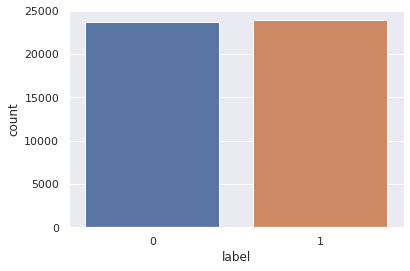

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.countplot(df.label)
plt.show()

In [ ]:
df[df.label == 0].describe()

,label
count,23758.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [ ]:
pip install text-hammer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 18.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import text_hammer as th

In [ ]:
%%time

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_stopwords(x))
#     df[column] = df[column].progress_apply(lambda x:th.spelling_correction(x))

    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

CPU times: user 803 µs, sys: 1.06 ms, total: 1.86 ms
Wall time: 1.53 ms


In [ ]:
cleaned_df = text_preprocessing(df, "text")

  0%|          | 0/47673 [00:00<?, ?it/s]

  0%|          | 0/47673 [00:00<?, ?it/s]

  0%|          | 0/47673 [00:00<?, ?it/s]

  0%|          | 0/47673 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:421: MarkupResemblesLocatorWarning: "https://www.qualify.com/terms.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:421: MarkupResemblesLocatorWarning: "https://www.qualify.com/exclusionary.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:333: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:421:

  0%|          | 0/47673 [00:00<?, ?it/s]

  0%|          | 0/47673 [00:00<?, ?it/s]

  0%|          | 0/47673 [00:00<?, ?it/s]

  0%|          | 0/47673 [00:00<?, ?it/s]

In [ ]:
cleaned_df.isna()

In [ ]:
cleaned_df.label

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk



### Calculating the word frequency by using nltk
words_list = []
for sentence in cleaned_df.text:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(50)

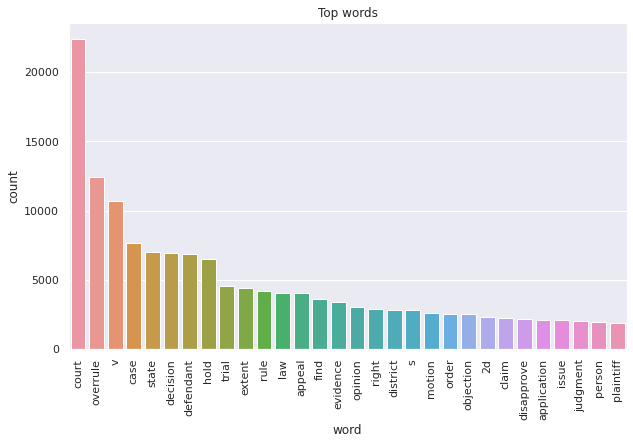

In [ ]:
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count',
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical');

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(cleaned_df.text, cleaned_df.label, test_size = 0.2, stratify = cleaned_df.label)